1)**AdaBoost** e **Gradient Boosting Machines (GBM)** são algoritmos de aprendizado de máquina que se enquadram na categoria de boosting, que é uma técnica de combinação de modelos de aprendizado de máquina fracos em um modelo mais forte. Algumas diferenças entre AdaBoost e GBM são:

1. Funcionamento: AdaBoost é um algoritmo iterativo que ajusta os pesos das instâncias de treinamento em cada iteração. GBM, por outro lado, é um algoritmo de descida de gradiente que minimiza o erro da função de perda em cada iteração, ajustando os parâmetros do modelo.

2. Sensibilidade ao ruído: AdaBoost é mais sensível a dados ruidosos e outliers, pois os atribui maior peso nas iterações subsequentes. GBM é menos sensível a dados ruidosos, pois utiliza o gradiente da função de perda para minimizar o erro e ajustar os parâmetros.

3. Complexidade do modelo: AdaBoost é limitado a modelos lineares e árvores de decisão simples, enquanto GBM é capaz de lidar com modelos mais complexos, como árvores de decisão profundas e redes neurais.

4. Tempo de treinamento: AdaBoost é geralmente mais rápido para treinar, pois as iterações são independentes e podem ser paralelizadas. GBM pode ser mais lento para treinar, pois cada iteração depende dos resultados das iterações anteriores.

5. Ajuste de hiperparâmetros: AdaBoost é menos sensível a hiperparâmetros, pois os pesos das instâncias de treinamento são ajustados automaticamente em cada iteração. GBM requer ajuste cuidadoso de hiperparâmetros, como taxa de aprendizado, profundidade da árvore e número de iterações, para evitar overfitting e obter um bom desempenho.

2)Acesse o link Scikit-learn–GBM, leia a explicação (traduza se for preciso) e crie um jupyternotebook contendo o exemplo de classificação e de regressão do GBM.

Gradient Tree Boosting ou Gradient Boosted Decision Trees (GBDT) é uma generalização de aumentar para funções de perda diferenciáveis arbitrárias, ver o trabalho seminal de [Friedman2001]. O GBDT é um procedimento preciso e eficaz que pode ser usado para problemas de regressão e classificação em um variedade de áreas, incluindo pesquisa na Web, classificação e ecologia.

O módulo fornece métodos tanto para classificação quanto para regressão via decisão impulsionada por gradiente Árvores.

Nota: O Scikit-learn 0.21 introduz duas novas implementações de árvores de aumento de gradiente, ou seja, e , inspirado em LightGBM (Veja [LightGBM]).
Esses estimadores baseados em histogramas podem ser ordens de grandeza mais rápidos do que e quando o número de amostras é maior do que dezenas de milhares de amostras.

Eles também têm suporte embutido para valores faltantes, o que evita a necessidade para um imputador.

Esses estimadores são descritos com mais detalhes abaixo em Aumento de gradiente baseado em histograma.

O guia a seguir se concentra em e , que pode ser preferido para pequenas tamanhos de amostra, uma vez que o binning pode levar a pontos de divisão que são muito aproximados neste cenário.

O uso e os parâmetros de e são descritos abaixo. Os 2 mais importantes parâmetros desses estimadores são e .n_estimatorslearning_rate

1.11.4.1. Classificação
suporta binário e multiclasse classificação. O exemplo a seguir mostra como ajustar um classificador de aumento de gradiente com 100 tocos de decisão como alunos fracos:

In [5]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)


0.913

1.11.4.2. Regressão
suporta um número de diferentes funções de perda para regressão que podem ser especificadas através do argumento; A função de perda padrão para regressão é erro quadrado ().loss'squared_error'

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error'
).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

**Regressão de aumento de gradiente** 

The mean squared error (MSE) on test set: 3018.9658


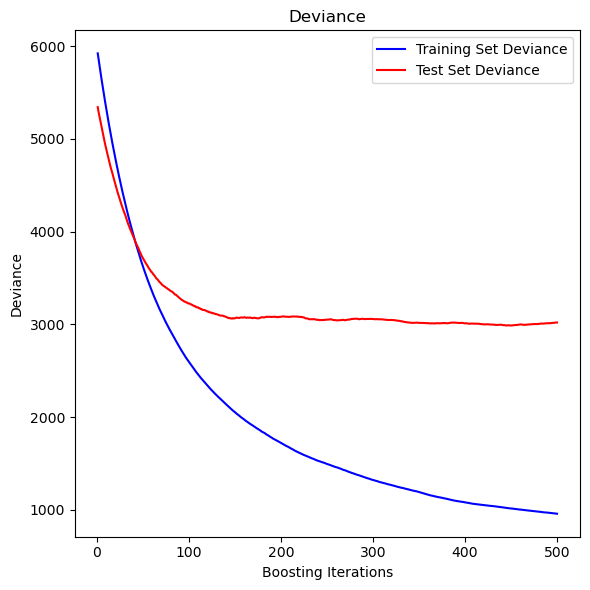

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

##Carregar os dados
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

##Pré-processamento de dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

##Modelo de regressão de ajuste
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

##Desvio de treinamento de enredo
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

3)Cite 5 Hyperparametrosimportantes no GBM.

n_estimators int, padrão=100
O número de estágios de reforço a realizar. Aumento de gradiente é bastante robusto para over-fitting por isso um grande número geralmente resulta em melhor desempenho. Os valores devem estar no intervalo .

learning_rate float, padrão=0,1
A taxa de aprendizagem diminui a contribuição de cada árvore em . Há um trade-off entre learning_rate e n_estimators. Os valores devem estar no intervalo .

max_depth int ou Nenhum, padrão=3
Profundidade máxima dos estimadores de regressão individuais. O máximo A profundidade limita o número de nós na árvore. Ajustar este parâmetro para melhor desempenho; o melhor valor depende da interação das variáveis de entrada. Se Nenhum, os nós serão expandidos até todas as folhas são puras ou até que todas as folhas contenham menos de min_samples_split amostras. Se int, os valores devem estar no intervalo .

random_state int, instância RandomState ou None, default=None
Controla a semente aleatória dada a cada estimador de árvore em cada impulsionando a iteração. Além disso, controla a permutação aleatória dos recursos em cada divisão (consulte Notas para obter mais detalhes). Ele também controla a divisão aleatória dos dados de treinamento para obter um conjunto de validação se não for Nenhum. Passe um int para saída reproduzível em várias chamadas de função.

loss{'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'
Função de perda a ser otimizada. 'squared_error' refere-se ao quadrado erro para regressão. «absolute_error» refere-se ao erro absoluto de regressão e é uma função de perda robusta. 'Huber' é um combinação dos dois. 'quantil' permite regressão quantílica (use para especificar o quantil).

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error'
).fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

4)***LOAD_IRIS***

In [15]:
##1.11.6.2. Utilização
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [17]:
##1.11.6.3. Probabilidades médias ponderadas (voto suave)

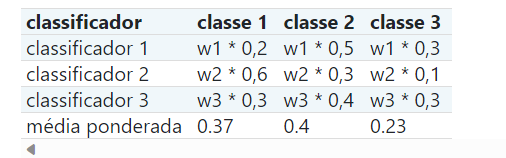

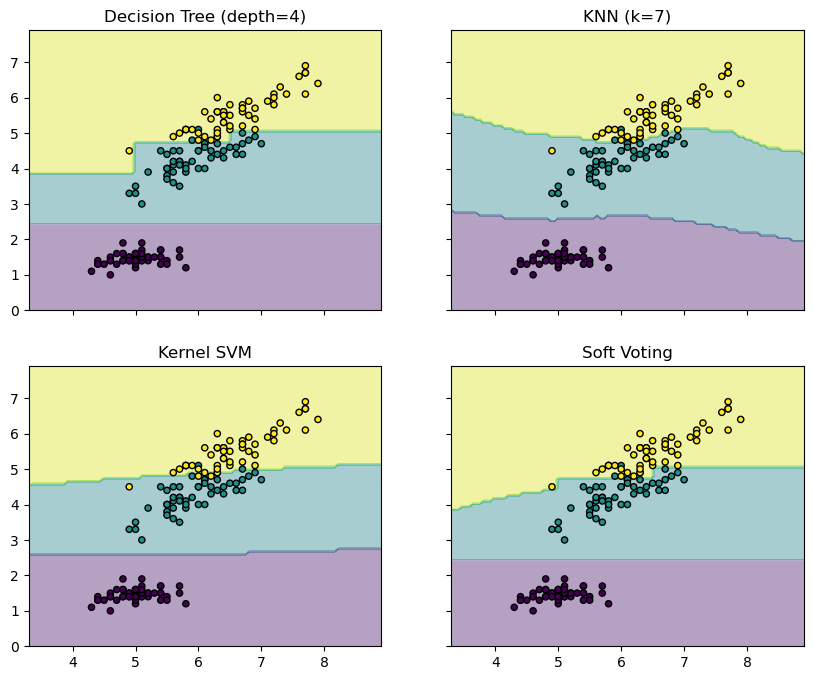

In [19]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

5)O nome **"Stochastic"** no **StochasticGBM** refere-se ao fato de que o algoritmo utiliza uma amostra aleatória dos dados de treinamento para ajustar cada árvore de decisão. Isso é diferente do **GBM convencional**, que utiliza todos os dados de treinamento para ajustar cada árvore de decisão. Portanto, a principal diferença entre os dois algoritmos é que o **StochasticGBM** introduz um elemento de aleatoriedade no processo de ajuste das árvores de decisão, o que pode tornar o modelo mais robusto e menos propenso a overfitting.